<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

This project aims to explore the validity of [Public Counsel's Lawsuit](http://www.publiccounsel.org/tools/assets/files/1250.pdf), stating that *“ACT/SAT test score requirement discriminates against low-income, historically disenfranchised minority, and disabled undergraduate applicants”*, to help University X decide on whether or not they should drop SAT test scores as an admission requirement.

### Contents:
- [Background](#Background)
- [Chosen Datasets](#Chosen-Datasets)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from students' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. In December of 2019, Public Counsel represented multiple students, nonprofit organizations and a Californian school district to sue the University of California Board of Regents on the basis that the use of SAT/ACT as a submission requirement is *["creating barriers to higher education for low-income students, students of color, and students with disabilities"](http://www.publiccounsel.org/stories?id=0283)*. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

## Chosen Datasets

**SAT Data**

- [SAT 2018 Data](https://reports.collegeboard.org/archive/sat-suite-program-results/2018/class-2018-results)
- [SAT 2019 Data](https://reports.collegeboard.org/archive/sat-suite-program-results/2019/class-2019-results)

**Additional Datasets**

- [Household Median Income](https://www.census.gov/search-results.html?q=average+per+capita+income&search.x=0&search.y=0&search=submit&page=1&stateGeo=none&searchtype=web&cssp=SERP)
- [Population Distribution by Race](https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)

The following libraries are imported to be able to analyse the datasets:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Import and Cleansing

**Step 1:** Dataframes are created using Pandas' *read_csv()* function and assigned to variables

In [2]:
sat_2018 = pd.read_csv("../data/sat_2018.csv")
sat_2019 = pd.read_csv("../data/sat_2019.csv")
household_median_income = pd.read_csv("../data/median_household_income.csv")
population_distribution_by_race_2018 = pd.read_csv("../data/population_distribution_2018.csv")
population_distribution_by_race_2019 = pd.read_csv("../data/population_distribution_2019.csv")

**Step 2:** Display top 5 series within each Dataframe

In [3]:
# source to add title above dataframe: https://stackoverflow.com/questions/57958432/how-to-add-table-title-in-python-preferably-with-pandas
sat_2018.head(5).style.set_caption("2018 SAT Participation Rate and Score per State")

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [4]:
sat_2019.head(5).style.set_caption("2019 SAT Participation Rate and Score per State")

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [5]:
household_median_income.head(5).style.set_caption("Median Income of Household per State")

,Median Household Income by State,Unnamed: 1,Unnamed: 2
0,State,Income,Margin Of Error
1,Alabama,"$50,536",+/- $304
2,Alaska,"$77,640","+/- $1,015"
3,Arizona,"$58,945",+/- $266
4,Arkansas,"$47,597",+/- $328


In [6]:
population_distribution_by_race_2018.head(5).style.set_caption("2018 Population Distribution by Ethnicity / Race per State")

,Location,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Total,Footnotes
0,United States,192117000.000000,38655700.000000,58483600.000000,17844800.000000,2082800.000000,519500.000000,8795000.000000,318498500.000000,1.000000
1,Alabama,3115600.000000,1257300.000000,204800.000000,63800.000000,19000.000000,nan,90700.000000,4752600.000000,nan
2,Alaska,426100.000000,20700.000000,50200.000000,43200.000000,110300.000000,7400.000000,51100.000000,709100.000000,nan
3,Arizona,3815100.000000,297000.000000,2213600.000000,227200.000000,271900.000000,12000.000000,167400.000000,7004300.000000,nan
4,Arkansas,2110400.000000,436900.000000,224900.000000,44200.000000,17000.000000,8200.000000,79700.000000,2921300.000000,nan


In [7]:
population_distribution_by_race_2019.head(5).style.set_caption("2019 Population Distribution by Ethnicity / Race per State")

,Location,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Total,Footnotes
0,United States,191757100.000000,38872200.000000,59102900.000000,18007200.000000,2125700.000000,528200.000000,8856100.000000,319249300.000000,1.000000
1,Alabama,3117200.000000,1263500.000000,211700.000000,65200.000000,18800.000000,nan,89200.000000,4767100.000000,nan
2,Alaska,421100.000000,15200.000000,48900.000000,42000.000000,106000.000000,10400.000000,58200.000000,701700.000000,nan
3,Arizona,3843700.000000,306600.000000,2254800.000000,231000.000000,276100.000000,12500.000000,173400.000000,7098000.000000,nan
4,Arkansas,2108400.000000,444200.000000,226800.000000,45500.000000,16700.000000,10800.000000,70100.000000,2922500.000000,nan


**Step 3:** Check for Missing Values

*2018 SAT Participation Rate and Score per State*

In [8]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


*2019 SAT Participation Rate and Score per State*

In [9]:
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


*Median Income of Household per State*

In [10]:
household_median_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Median Household Income by State  54 non-null     object
 1   Unnamed: 1                        53 non-null     object
 2   Unnamed: 2                        53 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


*2018 Population Distribution by Ethnicity / Race per State*

In [11]:
population_distribution_by_race_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Location                                63 non-null     object 
 1   White                                   53 non-null     float64
 2   Black                                   53 non-null     float64
 3   Hispanic                                53 non-null     float64
 4   Asian                                   52 non-null     float64
 5   American Indian/Alaska Native           48 non-null     float64
 6   Native Hawaiian/Other Pacific Islander  20 non-null     float64
 7   Multiple Races                          53 non-null     float64
 8   Total                                   53 non-null     float64
 9   Footnotes                               1 non-null      float64
dtypes: float64(9), object(1)
memory usage: 5.6+ KB


*2019 Population Distribution by Ethnicity / Race per State*

In [12]:
population_distribution_by_race_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Location                                63 non-null     object 
 1   White                                   53 non-null     float64
 2   Black                                   53 non-null     float64
 3   Hispanic                                53 non-null     float64
 4   Asian                                   52 non-null     float64
 5   American Indian/Alaska Native           51 non-null     float64
 6   Native Hawaiian/Other Pacific Islander  22 non-null     float64
 7   Multiple Races                          53 non-null     float64
 8   Total                                   53 non-null     float64
 9   Footnotes                               1 non-null      float64
dtypes: float64(9), object(1)
memory usage: 5.6+ KB


**Step 4:** Check for Observational Issues

In [13]:
sat_2018.describe().style.set_caption("2018 SAT Participation Rate and Score per State")

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [14]:
sat_2019.describe().style.set_caption("2019 SAT Participation Rate and Score per State")

,EBRW,Math,Total
count,53.000000,53.000000,53.000000
mean,558.000000,548.471698,1106.528302
std,47.554422,53.785044,100.994784
min,483.000000,445.000000,935.000000
25%,518.000000,506.000000,1024.000000
50%,550.000000,545.000000,1097.000000
75%,610.000000,596.000000,1200.000000
max,636.000000,648.000000,1284.000000


In [15]:
household_median_income.describe().style.set_caption("Median Income of Household per State")

,Median Household Income by State,Unnamed: 1,Unnamed: 2
count,54,53,53
unique,54,53,50
top,Nebraska,"$64,894",+/- $294
freq,1,1,3


In [16]:
population_distribution_by_race_2018.describe().style.set_caption("2018 Population Distribution by Ethnicity / Race per State")

,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Total,Footnotes
count,53.000000,53.000000,53.000000,52.000000,48.000000,20.000000,53.000000,53.000000,1.000000
mean,7250267.924528,1458779.245283,2265871.698113,686344.230769,86625.000000,49255.000000,331973.584906,12078518.867925,1.000000
std,26087469.058857,5284733.175542,8301059.143900,2560983.628005,300553.368009,116740.997512,1202019.674124,43475346.172139,nan
min,30000.000000,2700.000000,11000.000000,6000.000000,1600.000000,1900.000000,4600.000000,560300.000000,1.000000
25%,1213400.000000,57000.000000,155000.000000,38575.000000,12075.000000,6375.000000,37100.000000,1752300.000000,1.000000
50%,2953400.000000,328400.000000,393600.000000,116550.000000,19100.000000,10500.000000,116200.000000,4320300.000000,1.000000
75%,5006200.000000,1298200.000000,949700.000000,386175.000000,49075.000000,21050.000000,252400.000000,7368000.000000,1.000000
max,192117000.000000,38655700.000000,58483600.000000,17844800.000000,2082800.000000,519500.000000,8795000.000000,318498500.000000,1.000000


In [17]:
population_distribution_by_race_2019.describe().style.set_caption("2019 Population Distribution by Ethnicity / Race per State")

,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Total,Footnotes
count,53.000000,53.000000,53.000000,52.000000,51.000000,22.000000,53.000000,53.000000,1.000000
mean,7236920.754717,1466935.849057,2288907.547170,692586.538462,83331.372549,45954.545455,334358.490566,12106847.169811,1.000000
std,26037529.191352,5314423.904957,8384190.332218,2582992.070997,298118.008507,114329.293531,1210556.265879,43576448.816947,nan
min,42600.000000,3100.000000,10600.000000,3400.000000,1600.000000,1000.000000,9100.000000,562700.000000,1.000000
25%,1213500.000000,55900.000000,160800.000000,36375.000000,11650.000000,4650.000000,40200.000000,1750900.000000,1.000000
50%,2934100.000000,344900.000000,401700.000000,121550.000000,17500.000000,10600.000000,111900.000000,4319300.000000,1.000000
75%,5013200.000000,1305100.000000,964700.000000,385575.000000,43500.000000,18625.000000,253900.000000,7423900.000000,1.000000
max,191757100.000000,38872200.000000,59102900.000000,18007200.000000,2125700.000000,528200.000000,8856100.000000,319249300.000000,1.000000


**Step 5:** Fix errors within the Dataframes Identified Above 

*2019 SAT Participation Rate and Score per State*

Looking at the number of rows/"Range Index" using the *.info()* function, we can see that within the 2019 SAT Dataframe, there are two additional "states" that are not actually considered US states. Therefore for the purposes of this analysis, Puerto Rico and Virgin Islands are to be removed as shown below.

In [18]:
sat_2019 = sat_2019[(sat_2019["State"] != "Puerto Rico") & (sat_2019["State"] != "Virgin Islands")]

sat_2019.shape

(51, 5)

*Median Income of Household per State*

Column names within the Dataframe is incorrect due to .cvs formatting, and series within the dataframe include actual column name, data for Puerto Rico and source of dataset. Using multiple pd functions such as *.rename()*, *.dropna()* and data filtering, the errors mentioned are fixed.

In [19]:
household_median_income = household_median_income.rename(columns={"Median Household Income by State":"state","Unnamed: 1":"median_income","Unnamed: 2":"margin_of_error"})
household_median_income = household_median_income[(household_median_income["state"] != "State") & (household_median_income["state"] != "Puerto Rico") & (household_median_income["state"] != "Virgin Islands")]
household_median_income.dropna(inplace=True)

household_median_income.shape

(51, 3)

*Population Distribution by Ethnicity / Race per State*

For both 2018 and 2019 Dataframes on population distribution, there seem to be similar issues, which are:

1. Footnote column: Mostly nulls, and not needed for the purposes of the analysis
2. Additional rows: Due to the formatting of the .csv file, additional notes are added as rows onto the Dataframe. Although values within  columns of the unnecessary rows are mostly Nonetype, due to the nature of the data, some states are expected to have NoneType values in relation to ethnicity penetration - being that estimates with relative standard errors greater than 30% are not provided by the source. Therefore, *.dropna()* is not applicable here.
3. US territories: Include data on US territories such as Puerto Rico
4. Total Row: There is a row which includes total US population which is not needed for the purposes of this analysis

The above issues are handled as follows:

In [20]:
# 2018
population_distribution_by_race_2018.drop(columns="Footnotes", inplace= True)
population_distribution_by_race_2018 = population_distribution_by_race_2018[(population_distribution_by_race_2018["Location"] != "United States") & (population_distribution_by_race_2018["Location"] != "Puerto Rico") & (population_distribution_by_race_2018["Location"] != "Virgin Islands")]

In [21]:
population_distribution_by_race_2018.tail(20) #to check how many rows are to be dropped

,Location,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Total
49,West Virginia,1620000.0,63300.0,22500.0,13100.0,1600.0,NaN,31300.0,1752300.0
50,Wisconsin,4598500.0,349400.0,393600.0,159500.0,43800.0,1900.0,116200.0,5662800.0
51,Wyoming,471600.0,2700.0,56000.0,6000.0,12900.0,NaN,11100.0,560300.0
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,Population and demographic data on are based o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Population numbers are rounded to the nearest ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Sources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
population_distribution_by_race_2018 = population_distribution_by_race_2018.head(51)
population_distribution_by_race_2018.shape

(51, 9)

In [23]:
# 2019
population_distribution_by_race_2019.drop(columns="Footnotes", inplace= True)
population_distribution_by_race_2019 = population_distribution_by_race_2019[(population_distribution_by_race_2019["Location"] != "United States") & (population_distribution_by_race_2019["Location"] != "Puerto Rico") & (population_distribution_by_race_2019["Location"] != "Virgin Islands")]

In [24]:
population_distribution_by_race_2019.tail(20) #to check how many rows are to be dropped

,Location,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Total
49,West Virginia,1609000.0,55900.0,24800.0,14200.0,3900.0,NaN,31200.0,1739000.0
50,Wisconsin,4602500.0,349200.0,401700.0,169100.0,37400.0,NaN,114100.0,5677100.0
51,Wyoming,471600.0,5400.0,57100.0,3400.0,12300.0,NaN,12000.0,562700.0
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,Population and demographic data on are based o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Population numbers are rounded to the nearest ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Sources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
population_distribution_by_race_2019 = population_distribution_by_race_2019.head(51)
population_distribution_by_race_2019.shape

(51, 9)

**Step 6:**  Display the data types of each feature

*2018 SAT Participation Rate and Score per State*

In [26]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

*2019 SAT Participation Rate and Score per State*

In [27]:
sat_2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

*Median Income of Household per State*

In [28]:
household_median_income.dtypes

state              object
median_income      object
margin_of_error    object
dtype: object

*2018 Population Distribution by Ethnicity / Race per State*

In [29]:
population_distribution_by_race_2018.dtypes

Location                                   object
White                                     float64
Black                                     float64
Hispanic                                  float64
Asian                                     float64
American Indian/Alaska Native             float64
Native Hawaiian/Other Pacific Islander    float64
Multiple Races                            float64
Total                                     float64
dtype: object

*2019 Population Distribution by Ethnicity / Race per State*

In [30]:
population_distribution_by_race_2019.dtypes

Location                                   object
White                                     float64
Black                                     float64
Hispanic                                  float64
Asian                                     float64
American Indian/Alaska Native             float64
Native Hawaiian/Other Pacific Islander    float64
Multiple Races                            float64
Total                                     float64
dtype: object

**Step 7:** Fix errors regarding the Dataframes' dtypes

Looking at the different datatypes within the Dataframes above, the following needs to be fixed:
- Participation Rate for SAT data for both 2018 and 2019 to be converted from "object"/string to float
- Income column for househould median income Dataframe to be converted from "object"/string to int. In the case of Margin of Error, because the dataset would not be used for the purposes of this analysis, the column would be dropped after the following step
- For the purposes of the analysis, it is neccessary for the population by race datatype to be a percentage of total population

To change data type within the column, the following functions can be applied:

In [31]:
def percent_string_to_float(string):
    return float(string.replace("%",""))/100

def dollars_string_to_int(string):
    return int(string.replace("$","").replace(",",""))

In [32]:
sat_2018["Participation"] = sat_2018["Participation"].map(percent_string_to_float)
sat_2019["Participation Rate"] = sat_2019["Participation Rate"].map(percent_string_to_float)
household_median_income["median_income"] = household_median_income["median_income"].map(dollars_string_to_int)

A For-loop was created to change data type of particular columns within the population distribution dataframes to ease the process

In [33]:
for column in list(population_distribution_by_race_2018.columns)[1:-1]:
    population_distribution_by_race_2018[column] = population_distribution_by_race_2018[column] / population_distribution_by_race_2018["Total"]

In [34]:
for column in list(population_distribution_by_race_2019.columns)[1:-1]:
    population_distribution_by_race_2019[column] = population_distribution_by_race_2019[column] / population_distribution_by_race_2019["Total"]

Total population for both 2018 and 2019 can now be changed to an interger

In [35]:
population_distribution_by_race_2018["Total"] = population_distribution_by_race_2018["Total"].astype(int)
population_distribution_by_race_2019["Total"] = population_distribution_by_race_2019["Total"].astype(int)

**Step 8:** Rename columns
    
Being that the Dataframes above are to be merged, it is neccessary to rename the columns so that they are unique and informative

In [36]:
sat_2018 = sat_2018.rename(columns={'State':'state',
                                    'Total':"total_sat_results_2018",
                                    "Participation":"sat_participation_2018",
                                    "Math":"sat_math_2018",
                                    "Evidence-Based Reading and Writing":"sat_ebrw_2018"})

sat_2019 = sat_2019.rename(columns={'State':'state',
                                    'Total':"total_sat_results_2019",
                                    "Participation Rate":"sat_participation_2019",
                                    "Math":"sat_math_2019",
                                    "EBRW":"sat_ebrw_2019"})

In [37]:
#household_median_income columns were renamed during the process above

In [38]:
population_distribution_by_race_2018 = population_distribution_by_race_2018.rename(columns={"Location":"state",
                        "White":"white_pop_penetration_2018",
                        "Black":"black_pop_penetration_2018",
                        "Hispanic":"hispanic_pop_penetration_2018",
                        "Asian":"asian_pop_penetration_2018",
                        "American Indian/Alaska Native":"native_american_pop_penetration_2018",
                        "Native Hawaiian/Other Pacific Islander":"pacific_islander_pop_penetration_2018",
                        "Multiple Races":"multiple_races_pop_penetration_2018",
                        "Total":"total_population_2018"})

population_distribution_by_race_2019 = population_distribution_by_race_2019.rename(columns={"Location":"state",
                        "White":"white_pop_penetration_2019",
                        "Black":"black_pop_penetration_2019",
                        "Hispanic":"hispanic_pop_penetration_2019",
                        "Asian":"asian_pop_penetration_2019",
                        "American Indian/Alaska Native":"native_american_pop_penetration_2019",
                        "Native Hawaiian/Other Pacific Islander":"pacific_islander_pop_penetration_2019",
                        "Multiple Races":"multiple_races_pop_penetration_2019",
                        "Total":"total_population_2019"})

**Step 9:** Drop Unnecessary Columns / Rows

As stated above, the margin_of_error column in the household_median_income Dataframe is to be dropped

In [39]:
household_median_income.drop(columns="margin_of_error", inplace=True)

**Step 10:** Merge Dataframes

In [40]:
# adapted from: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

merged_df = sat_2018.merge(sat_2019,on="state").merge(household_median_income,on="state").merge(population_distribution_by_race_2018,on="state").merge(population_distribution_by_race_2019,on="state")

**Step 11:** Save merged Dataframe to .csv file

In [41]:
merged_df.to_csv(r'../data/final_dataframe.csv',index=False)

In [42]:
merged_df.dtypes

state                                     object
sat_participation_2018                   float64
sat_ebrw_2018                              int64
sat_math_2018                              int64
total_sat_results_2018                     int64
sat_participation_2019                   float64
sat_ebrw_2019                              int64
sat_math_2019                              int64
total_sat_results_2019                     int64
median_income                              int64
white_pop_penetration_2018               float64
black_pop_penetration_2018               float64
hispanic_pop_penetration_2018            float64
asian_pop_penetration_2018               float64
native_american_pop_penetration_2018     float64
pacific_islander_pop_penetration_2018    float64
multiple_races_pop_penetration_2018      float64
total_population_2018                      int64
white_pop_penetration_2019               float64
black_pop_penetration_2019               float64
hispanic_pop_penetra

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|All|States in America + District of Columbia| 
|**sat_participation_2018**|*float*|sat_2018|Percent of students participating in SAT in 2018|
|**sat_ebrw_2018**|*integer*|sat_2018|Average Evidence-Based Reading and Writing scores in 2018|
|**sat_math_2018**|*integer*|sat_2018|Average Math scores in 2018|
|**total_sat_results_2018**|*integer*|sat_2018|Average total SAT score in 2018|
|**sat_participation_2019**|*float*|sat_2019|Percent of students participating in SAT in 2019|
|**sat_ebrw_2019**|*integer*|sat_2019|Average Evidence-Based Reading and Writing scores in 2019|
|**sat_math_2019**|*integer*|sat_2019|Average Math scores in 2019|
|**total_sat_results_2019**|*integer*|sat_2019|Average total SAT score in 2019|
|**median_income**|*integer*|household_median_income|American households' median income (Source: 2015-2019 American Community Survey 5-Year Estimates)|
|**white_pop_penetration_2018**|*float*|population_distribution_by_race_2018|Percent of the white population as percent of total population in 2018 (Source: KFF)|
|**black_pop_penetration_2018**|*float*|population_distribution_by_race_2018|Percent of the black population as percent of total population in 2018 (Source: KFF)|
|**hispanic_pop_penetration_2018**|*float*|population_distribution_by_race_2018|Percent of the hispanic population as percent of total population in 2018 (Source: KFF)|
|**asian_pop_penetration_2018**|*float*|population_distribution_by_race_2018|Percent of the Asian population as percent of total population in 2018 (Source: KFF)|
|**native_american_pop_penetration_2018**|*float*|population_distribution_by_race_2018|Percent of the Native American population as percent of total population in 2018 (Source: KFF)|
|**pacific_islander_pop_penetration_2018**|*float*|population_distribution_by_race_2018|Percent of the Pacific Islander population as percent of total population in 2018 (Source: KFF)|
|**multiple_races_pop_penetration_2018**|*float*|population_distribution_by_race_2018|Percent of mixed-race population as percent of total population in 2018 (Source: KFF)|
|**total_population_2018**|*integer*|population_distribution_by_race_2018|Total population in 2018 rounded to the nearest 100 (Source: KFF)|
|**white_pop_penetration_2019**|*float*|population_distribution_by_race_2019|Percent of the white population as percent of total population in 2019 (Source: KFF)|
|**black_pop_penetration_2019**|*float*|population_distribution_by_race_2019|Percent of the black population as percent of total population in 2019 (Source: KFF)|
|**hispanic_pop_penetration_2019**|*float*|population_distribution_by_race_2019|Percent of the hispanic population as percent of total population in 2019 (Source: KFF)|
|**asian_pop_penetration_2019**|*float*|population_distribution_by_race_2019|Percent of the Asian population as percent of total population in 2019 (Source: KFF)|
|**native_american_pop_penetration_2019**|*float*|population_distribution_by_race_2019|Percent of the Native American population as percent of total population in 2019 (Source: KFF)|
|**pacific_islander_pop_penetration_2019**|*float*|population_distribution_by_race_2019|Percent of the Pacific Islander population as percent of total population in 2019 (Source: KFF)|
|**multiple_races_pop_penetration_2019**|*float*|population_distribution_by_race_2019|Percent of mixed-race population as percent of total population in 2019 (Source: KFF)|
|**total_population_2019**|*integer*|population_distribution_by_race_2019|Total population in 2019 rounded to the nearest 100 (Source: KFF)||

## Exploratory Data Analysis

**Step 1:** Show Summary Statistics

In [43]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2018,51.0,4.574510e-01,3.731426e-01,0.020000,4.500000e-02,5.200000e-01,7.750000e-01,1.000000e+00
sat_ebrw_2018,51.0,5.636863e+02,4.750263e+01,480.000000,5.345000e+02,5.520000e+02,6.105000e+02,6.430000e+02
sat_math_2018,51.0,5.562353e+02,4.777262e+01,480.000000,5.225000e+02,5.440000e+02,5.935000e+02,6.550000e+02
total_sat_results_2018,51.0,1.120020e+03,9.415508e+01,977.000000,1.057500e+03,1.098000e+03,1.204000e+03,1.298000e+03
sat_participation_2019,51.0,4.905882e-01,3.874760e-01,0.020000,5.500000e-02,5.400000e-01,8.200000e-01,1.000000e+00
sat_ebrw_2019,51.0,5.608039e+02,4.624804e+01,483.000000,5.275000e+02,5.500000e+02,6.120000e+02,6.360000e+02
sat_math_2019,51.0,5.521961e+02,5.129055e+01,460.000000,5.115000e+02,5.460000e+02,5.990000e+02,6.480000e+02
total_sat_results_2019,51.0,1.113078e+03,9.719791e+01,943.000000,1.038000e+03,1.097000e+03,1.210000e+03,1.284000e+03
median_income,51.0,6.309786e+04,1.071513e+04,45081.000000,5.556050e+04,6.143900e+04,7.146350e+04,8.642000e+04
white_pop_penetration_2018,51.0,6.791556e-01,1.635790e-01,0.205565,5.777755e-01,7.082839e-01,7.957020e-01,9.337437e-01


**Step 2:** Calculating Standard Deviation

Using a function and dictionary comprehension, the standard deviation of each numerical column is to be stored in variable sd. 

In [44]:
def mean(num_list):
    add = 0
    for num in num_list:
        add += num
    return add / len(num_list)

def standard_deviation(num_list): 
    meaned = mean(num_list)
    x = 0
    for num in num_list:
        x += ((num-meaned)**2)
    return (x/(len(num_list))**(1/2))

In [45]:
sd = {column : standard_deviation(merged_df[column].dropna()) # nulls are dropped to be able to calculate SD of columns if not SD is NoneType
      for column in merged_df.columns 
      if (merged_df[column].dtype == int or merged_df[column].dtype == float)}
sd

{'sat_participation_2018': 0.9748425958630627,
 'sat_ebrw_2018': 15798.657302398791,
 'sat_math_2018': 15978.760777677027,
 'total_sat_results_2018': 62068.67223096993,
 'sat_participation_2019': 1.0511737851964853,
 'sat_ebrw_2019': 14975.160821923597,
 'sat_math_2019': 18418.729604565273,
 'total_sat_results_2019': 66145.2664548923,
 'median_income': 803859538.9536877,
 'white_pop_penetration_2018': 0.18734408308330064,
 'black_pop_penetration_2018': 0.07736802088180224,
 'hispanic_pop_penetration_2018': 0.07598509262114195,
 'asian_pop_penetration_2018': 0.021256216976795177,
 'native_american_pop_penetration_2018': 0.0062018216689384035,
 'pacific_islander_pop_penetration_2018': 0.0019092427046838183,
 'multiple_races_pop_penetration_2018': 0.004922318012386491,
 'total_population_2018': 360900666041088.94,
 'white_pop_penetration_2019': 0.18800817665579223,
 'black_pop_penetration_2019': 0.07810245245794374,
 'hispanic_pop_penetration_2019': 0.07653590320275375,
 'asian_pop_penetr

**Step 3:** Investigating Trends

1. Which states have the highest and lowest participation rates for the 2018 or 2019 SAT?

In [46]:
merged_df.sort_values("sat_participation_2018", ascending = False).head().style.set_caption("Data on States with Highest SAT Participation Rates in 2018")

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,total_sat_results_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,black_pop_penetration_2018,hispanic_pop_penetration_2018,asian_pop_penetration_2018,native_american_pop_penetration_2018,pacific_islander_pop_penetration_2018,multiple_races_pop_penetration_2018,total_population_2018,white_pop_penetration_2019,black_pop_penetration_2019,hispanic_pop_penetration_2019,asian_pop_penetration_2019,native_american_pop_penetration_2019,pacific_islander_pop_penetration_2019,multiple_races_pop_penetration_2019,total_population_2019
5,Colorado,1.000000,519,506,1025,1.000000,518,506,1024,72331,0.679489,0.038198,0.216176,0.031754,0.004968,0.000972,0.028442,5555200,0.677875,0.037617,0.217738,0.032129,0.005239,0.001105,0.028280,5611800
6,Connecticut,1.000000,535,519,1053,1.000000,529,516,1046,78444,0.662984,0.098953,0.166287,0.046534,0.001414,nan,0.023801,3466300,0.656821,0.100310,0.168911,0.045927,0.001622,nan,0.026091,3453300
7,Delaware,1.000000,505,492,998,1.000000,499,486,985,68287,0.621307,0.213181,0.094806,0.041698,0.003519,nan,0.025275,937700,0.614378,0.218122,0.096884,0.039243,0.003190,nan,0.027970,940300
22,Michigan,1.000000,511,499,1011,1.000000,507,496,1003,57144,0.749959,0.135302,0.051474,0.032323,0.004933,nan,0.025793,9770000,0.749201,0.133643,0.052695,0.032348,0.004823,nan,0.027126,9765600
12,Idaho,1.000000,508,493,1001,1.000000,505,488,993,55785,0.818562,0.005408,0.126483,0.015876,0.010526,nan,0.021575,1719600,0.816437,0.006568,0.128848,0.012337,0.009081,nan,0.025587,1750900


In [47]:
merged_df.sort_values("sat_participation_2018", ascending = True).head().style.set_caption("Data on States with Lowest SAT Participation Rates in 2018")

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,total_sat_results_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,black_pop_penetration_2018,hispanic_pop_penetration_2018,asian_pop_penetration_2018,native_american_pop_penetration_2018,pacific_islander_pop_penetration_2018,multiple_races_pop_penetration_2018,total_population_2018,white_pop_penetration_2019,black_pop_penetration_2019,hispanic_pop_penetration_2019,asian_pop_penetration_2019,native_american_pop_penetration_2019,pacific_islander_pop_penetration_2019,multiple_races_pop_penetration_2019,total_population_2019
34,North Dakota,0.020000,640,643,1283,0.020000,627,636,1263,64894,0.839173,0.030386,0.035313,0.019710,0.051328,nan,0.023816,730600,0.840766,0.024487,0.040219,0.014227,0.051984,nan,0.026129,731000
50,Wyoming,0.030000,633,625,1257,0.030000,623,615,1238,64049,0.841692,0.004819,0.099946,0.010709,0.023023,nan,0.019811,560300,0.838102,0.009597,0.101475,0.006042,0.021859,nan,0.021326,562700
41,South Dakota,0.030000,622,618,1240,0.030000,633,635,1268,58275,0.816425,0.021798,0.037823,0.012843,0.086132,nan,0.024979,848700,0.819335,0.022084,0.036885,0.012921,0.083989,nan,0.024081,851300
27,Nebraska,0.030000,629,623,1252,0.030000,628,631,1260,61439,0.786612,0.043930,0.110653,0.022901,0.006688,nan,0.029108,1868900,0.785066,0.047609,0.113258,0.024125,0.007899,nan,0.021456,1873600
49,Wisconsin,0.030000,641,653,1294,0.030000,635,648,1283,61747,0.812054,0.061701,0.069506,0.028166,0.007735,0.000336,0.020520,5662800,0.810713,0.061510,0.070758,0.029786,0.006588,nan,0.020098,5677100


In 2018, Colorado, Conneticut, Delaware, Michigan and Idaho had the highest participation rate at 100%, whilst North Dakota, Wyoming, South Dakota, Nebraska and Wisconsin have the lowest with rates >= 3%

In [48]:
merged_df.sort_values("sat_participation_2019", ascending = False).head().style.set_caption("Data on States with Highest SAT Participation Rates in 2019")

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,total_sat_results_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,black_pop_penetration_2018,hispanic_pop_penetration_2018,asian_pop_penetration_2018,native_american_pop_penetration_2018,pacific_islander_pop_penetration_2018,multiple_races_pop_penetration_2018,total_population_2018,white_pop_penetration_2019,black_pop_penetration_2019,hispanic_pop_penetration_2019,asian_pop_penetration_2019,native_american_pop_penetration_2019,pacific_islander_pop_penetration_2019,multiple_races_pop_penetration_2019,total_population_2019
39,Rhode Island,0.970000,513,505,1018,1.000000,503,492,995,67167,0.715385,0.056213,0.160454,0.034221,nan,nan,0.031164,1014000,0.705240,0.059286,0.166257,0.033428,0.002261,nan,0.033330,1017100
13,Illinois,0.990000,513,506,1019,1.000000,509,504,1013,65886,0.610070,0.135484,0.174765,0.056318,0.001174,0.000322,0.021852,12438400,0.608519,0.135889,0.176140,0.056260,0.000914,0.000243,0.022043,12362300
22,Michigan,1.000000,511,499,1011,1.000000,507,496,1003,57144,0.749959,0.135302,0.051474,0.032323,0.004933,nan,0.025793,9770000,0.749201,0.133643,0.052695,0.032348,0.004823,nan,0.027126,9765600
5,Colorado,1.000000,519,506,1025,1.000000,518,506,1024,72331,0.679489,0.038198,0.216176,0.031754,0.004968,0.000972,0.028442,5555200,0.677875,0.037617,0.217738,0.032129,0.005239,0.001105,0.028280,5611800
6,Connecticut,1.000000,535,519,1053,1.000000,529,516,1046,78444,0.662984,0.098953,0.166287,0.046534,0.001414,nan,0.023801,3466300,0.656821,0.100310,0.168911,0.045927,0.001622,nan,0.026091,3453300


In [49]:
merged_df.sort_values("sat_participation_2019", ascending = True).head().style.set_caption("Data on States with Lowest SAT Participation Rates in 2019")

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,total_sat_results_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,black_pop_penetration_2018,hispanic_pop_penetration_2018,asian_pop_penetration_2018,native_american_pop_penetration_2018,pacific_islander_pop_penetration_2018,multiple_races_pop_penetration_2018,total_population_2018,white_pop_penetration_2019,black_pop_penetration_2019,hispanic_pop_penetration_2019,asian_pop_penetration_2019,native_american_pop_penetration_2019,pacific_islander_pop_penetration_2019,multiple_races_pop_penetration_2019,total_population_2019
34,North Dakota,0.020000,640,643,1283,0.020000,627,636,1263,64894,0.839173,0.030386,0.035313,0.019710,0.051328,nan,0.023816,730600,0.840766,0.024487,0.040219,0.014227,0.051984,nan,0.026129,731000
50,Wyoming,0.030000,633,625,1257,0.030000,623,615,1238,64049,0.841692,0.004819,0.099946,0.010709,0.023023,nan,0.019811,560300,0.838102,0.009597,0.101475,0.006042,0.021859,nan,0.021326,562700
41,South Dakota,0.030000,622,618,1240,0.030000,633,635,1268,58275,0.816425,0.021798,0.037823,0.012843,0.086132,nan,0.024979,848700,0.819335,0.022084,0.036885,0.012921,0.083989,nan,0.024081,851300
27,Nebraska,0.030000,629,623,1252,0.030000,628,631,1260,61439,0.786612,0.043930,0.110653,0.022901,0.006688,nan,0.029108,1868900,0.785066,0.047609,0.113258,0.024125,0.007899,nan,0.021456,1873600
49,Wisconsin,0.030000,641,653,1294,0.030000,635,648,1283,61747,0.812054,0.061701,0.069506,0.028166,0.007735,0.000336,0.020520,5662800,0.810713,0.061510,0.070758,0.029786,0.006588,nan,0.020098,5677100


In 2019, Rhode Island, Illinois, Michigan, Colorado and Conneticut had the highest participation rates at 100%, whilst North Dakota, Wyoming, South Dakota, Nebraska and Wisconsin continue to have the lowest with rates >= 3%

2. Which states have the highest and lowest mean total scores for the 2018 or 2019 SAT?

In [50]:
merged_df.sort_values("total_sat_results_2018", ascending = False).head().style.set_caption("Data on States with Highest SAT Score Mean in 2018")

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,total_sat_results_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,black_pop_penetration_2018,hispanic_pop_penetration_2018,asian_pop_penetration_2018,native_american_pop_penetration_2018,pacific_islander_pop_penetration_2018,multiple_races_pop_penetration_2018,total_population_2018,white_pop_penetration_2019,black_pop_penetration_2019,hispanic_pop_penetration_2019,asian_pop_penetration_2019,native_american_pop_penetration_2019,pacific_islander_pop_penetration_2019,multiple_races_pop_penetration_2019,total_population_2019
23,Minnesota,0.040000,643,655,1298,0.040000,636,648,1284,71306,0.796156,0.064875,0.053944,0.047295,0.009419,nan,0.027856,5489000,0.790890,0.064137,0.055723,0.049412,0.009230,nan,0.030083,5514800
49,Wisconsin,0.030000,641,653,1294,0.030000,635,648,1283,61747,0.812054,0.061701,0.069506,0.028166,0.007735,0.000336,0.020520,5662800,0.810713,0.061510,0.070758,0.029786,0.006588,nan,0.020098,5677100
34,North Dakota,0.020000,640,643,1283,0.020000,627,636,1263,64894,0.839173,0.030386,0.035313,0.019710,0.051328,nan,0.023816,730600,0.840766,0.024487,0.040219,0.014227,0.051984,nan,0.026129,731000
15,Iowa,0.030000,634,631,1265,0.030000,622,622,1244,60523,0.855339,0.033466,0.060979,0.025975,0.002944,nan,0.019759,3056800,0.853081,0.038952,0.062610,0.023397,0.002876,0.000327,0.018757,3060200
16,Kansas,0.040000,633,631,1265,0.040000,618,623,1241,59597,0.759477,0.053540,0.119551,0.027996,0.005684,nan,0.032330,2814700,0.757221,0.054532,0.121621,0.028422,0.006225,nan,0.031695,2811200


In [51]:
merged_df.sort_values("total_sat_results_2018", ascending = True).head().style.set_caption("Data on States with Lowest SAT Score Mean in 2018")

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,total_sat_results_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,black_pop_penetration_2018,hispanic_pop_penetration_2018,asian_pop_penetration_2018,native_american_pop_penetration_2018,pacific_islander_pop_penetration_2018,multiple_races_pop_penetration_2018,total_population_2018,white_pop_penetration_2019,black_pop_penetration_2019,hispanic_pop_penetration_2019,asian_pop_penetration_2019,native_american_pop_penetration_2019,pacific_islander_pop_penetration_2019,multiple_races_pop_penetration_2019,total_population_2019
8,District of Columbia,0.920000,497,480,977,0.940000,495,480,975,86420,0.366522,0.449019,0.113191,0.035484,nan,nan,0.033688,667900,0.366602,0.450469,0.112021,0.037539,0.002681,nan,0.030538,671300
7,Delaware,1.000000,505,492,998,1.000000,499,486,985,68287,0.621307,0.213181,0.094806,0.041698,0.003519,nan,0.025275,937700,0.614378,0.218122,0.096884,0.039243,0.003190,nan,0.027970,940300
48,West Virginia,0.280000,513,486,999,0.990000,483,460,943,46711,0.924499,0.036124,0.012840,0.007476,0.000913,nan,0.017862,1752300,0.925244,0.032145,0.014261,0.008166,0.002243,nan,0.017941,1739000
12,Idaho,1.000000,508,493,1001,1.000000,505,488,993,55785,0.818562,0.005408,0.126483,0.015876,0.010526,nan,0.021575,1719600,0.816437,0.006568,0.128848,0.012337,0.009081,nan,0.025587,1750900
44,Utah,0.040000,480,530,1010,0.040000,614,615,1230,71621,0.779613,0.011526,0.141086,0.023439,0.009369,0.008564,0.026401,3105900,0.777496,0.010336,0.144257,0.023081,0.009860,0.008180,0.026759,3154100


In 2018, Minnesota, Wisconsin, North Dakota, Iowa and Kansas had the highest SAT score mean, whilst District of Columbia, Delaware, West Virginia, Idaho and Utah had the lowest, at a combined mean of 1281 and 997, respectively

In [52]:
merged_df.sort_values("total_sat_results_2019", ascending = False).head().style.set_caption("Data on States with Highest SAT Score Mean in 2019")

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,total_sat_results_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,black_pop_penetration_2018,hispanic_pop_penetration_2018,asian_pop_penetration_2018,native_american_pop_penetration_2018,pacific_islander_pop_penetration_2018,multiple_races_pop_penetration_2018,total_population_2018,white_pop_penetration_2019,black_pop_penetration_2019,hispanic_pop_penetration_2019,asian_pop_penetration_2019,native_american_pop_penetration_2019,pacific_islander_pop_penetration_2019,multiple_races_pop_penetration_2019,total_population_2019
23,Minnesota,0.040000,643,655,1298,0.040000,636,648,1284,71306,0.796156,0.064875,0.053944,0.047295,0.009419,nan,0.027856,5489000,0.790890,0.064137,0.055723,0.049412,0.009230,nan,0.030083,5514800
49,Wisconsin,0.030000,641,653,1294,0.030000,635,648,1283,61747,0.812054,0.061701,0.069506,0.028166,0.007735,0.000336,0.020520,5662800,0.810713,0.061510,0.070758,0.029786,0.006588,nan,0.020098,5677100
41,South Dakota,0.030000,622,618,1240,0.030000,633,635,1268,58275,0.816425,0.021798,0.037823,0.012843,0.086132,nan,0.024979,848700,0.819335,0.022084,0.036885,0.012921,0.083989,nan,0.024081,851300
34,North Dakota,0.020000,640,643,1283,0.020000,627,636,1263,64894,0.839173,0.030386,0.035313,0.019710,0.051328,nan,0.023816,730600,0.840766,0.024487,0.040219,0.014227,0.051984,nan,0.026129,731000
27,Nebraska,0.030000,629,623,1252,0.030000,628,631,1260,61439,0.786612,0.043930,0.110653,0.022901,0.006688,nan,0.029108,1868900,0.785066,0.047609,0.113258,0.024125,0.007899,nan,0.021456,1873600


In [53]:
merged_df.sort_values("total_sat_results_2019", ascending = True).head().style.set_caption("Data on States with Lowest SAT Score Mean in 2019")

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,total_sat_results_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,black_pop_penetration_2018,hispanic_pop_penetration_2018,asian_pop_penetration_2018,native_american_pop_penetration_2018,pacific_islander_pop_penetration_2018,multiple_races_pop_penetration_2018,total_population_2018,white_pop_penetration_2019,black_pop_penetration_2019,hispanic_pop_penetration_2019,asian_pop_penetration_2019,native_american_pop_penetration_2019,pacific_islander_pop_penetration_2019,multiple_races_pop_penetration_2019,total_population_2019
48,West Virginia,0.280000,513,486,999,0.990000,483,460,943,46711,0.924499,0.036124,0.012840,0.007476,0.000913,nan,0.017862,1752300,0.925244,0.032145,0.014261,0.008166,0.002243,nan,0.017941,1739000
35,Oklahoma,0.080000,541,521,1062,0.220000,490,472,963,52919,0.653075,0.070150,0.108540,0.020545,0.075470,0.000498,0.071696,3816100,0.650187,0.068672,0.110951,0.020617,0.077086,0.001202,0.071285,3826900
8,District of Columbia,0.920000,497,480,977,0.940000,495,480,975,86420,0.366522,0.449019,0.113191,0.035484,nan,nan,0.033688,667900,0.366602,0.450469,0.112021,0.037539,0.002681,nan,0.030538,671300
7,Delaware,1.000000,505,492,998,1.000000,499,486,985,68287,0.621307,0.213181,0.094806,0.041698,0.003519,nan,0.025275,937700,0.614378,0.218122,0.096884,0.039243,0.003190,nan,0.027970,940300
12,Idaho,1.000000,508,493,1001,1.000000,505,488,993,55785,0.818562,0.005408,0.126483,0.015876,0.010526,nan,0.021575,1719600,0.816437,0.006568,0.128848,0.012337,0.009081,nan,0.025587,1750900


In 2019, Minnesota, Wisconsin, South Dakota, North Dakota and Nebraska had the highst SAT score mean, whilst West Virginia, Oklahoma, District of Columbia, Delaware, and Idaho had the lowest, with a combined mean of 1272 and 972, respectively

3. Do any states with 100% participation on a given test have a rate change year-to-year?

In [54]:
merged_df[((merged_df["sat_participation_2018"] == 1) | 
         (merged_df["sat_participation_2019"] == 1)) &
         (merged_df["sat_participation_2018"] != merged_df["sat_participation_2019"])].head().style.set_caption("Data on States with a Decrease / Increase to/from 100% Participation Rate YoY")

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,total_sat_results_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,black_pop_penetration_2018,hispanic_pop_penetration_2018,asian_pop_penetration_2018,native_american_pop_penetration_2018,pacific_islander_pop_penetration_2018,multiple_races_pop_penetration_2018,total_population_2018,white_pop_penetration_2019,black_pop_penetration_2019,hispanic_pop_penetration_2019,asian_pop_penetration_2019,native_american_pop_penetration_2019,pacific_islander_pop_penetration_2019,multiple_races_pop_penetration_2019,total_population_2019
9,Florida,0.560000,550,549,1099,1.000000,516,483,999,55660,0.532617,0.150728,0.263315,0.027433,0.001885,0.000432,0.023585,20843500,0.529687,0.150062,0.266001,0.027320,0.001901,0.000581,0.024452,20992000
13,Illinois,0.990000,513,506,1019,1.000000,509,504,1013,65886,0.610070,0.135484,0.174765,0.056318,0.001174,0.000322,0.021852,12438400,0.608519,0.135889,0.176140,0.056260,0.000914,0.000243,0.022043,12362300
39,Rhode Island,0.970000,513,505,1018,1.000000,503,492,995,67167,0.715385,0.056213,0.160454,0.034221,nan,nan,0.031164,1014000,0.705240,0.059286,0.166257,0.033428,0.002261,nan,0.033330,1017100


Out of all states, Florida, Illinois and Rhode Island are the only 3 that had a rate change from 56%, 99% and 97% to 100% respectively. According to [Orlando Sentinel](https://www.orlandosentinel.com/news/education/os-ne-sat-scores-florida-20190924-2ycpuogc2ndkrkwzdrkrjgrg64-story.html), significant increase in participation for Florida is highly attributed towards "SAT school day" programs which allows students to take their SATs in school free of charge.

4. Do any states show have >50% participation on SAT tests each year?

In [55]:
merged_df[(merged_df["sat_participation_2018"] > 0.5) & 
         (merged_df["sat_participation_2019"] > 0.5)].style.set_caption("Data on States with more than 50% SAT Participation Rate in 2018 and 2019")

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,total_sat_results_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,black_pop_penetration_2018,hispanic_pop_penetration_2018,asian_pop_penetration_2018,native_american_pop_penetration_2018,pacific_islander_pop_penetration_2018,multiple_races_pop_penetration_2018,total_population_2018,white_pop_penetration_2019,black_pop_penetration_2019,hispanic_pop_penetration_2019,asian_pop_penetration_2019,native_american_pop_penetration_2019,pacific_islander_pop_penetration_2019,multiple_races_pop_penetration_2019,total_population_2019
4,California,0.600000,540,536,1076,0.630000,534,531,1065,75235,0.366668,0.053551,0.393882,0.146315,0.003105,0.003283,0.033191,38745900,0.363520,0.053472,0.395195,0.147275,0.003592,0.003545,0.033401,38642700
5,Colorado,1.000000,519,506,1025,1.000000,518,506,1024,72331,0.679489,0.038198,0.216176,0.031754,0.004968,0.000972,0.028442,5555200,0.677875,0.037617,0.217738,0.032129,0.005239,0.001105,0.028280,5611800
6,Connecticut,1.000000,535,519,1053,1.000000,529,516,1046,78444,0.662984,0.098953,0.166287,0.046534,0.001414,nan,0.023801,3466300,0.656821,0.100310,0.168911,0.045927,0.001622,nan,0.026091,3453300
7,Delaware,1.000000,505,492,998,1.000000,499,486,985,68287,0.621307,0.213181,0.094806,0.041698,0.003519,nan,0.025275,937700,0.614378,0.218122,0.096884,0.039243,0.003190,nan,0.027970,940300
8,District of Columbia,0.920000,497,480,977,0.940000,495,480,975,86420,0.366522,0.449019,0.113191,0.035484,nan,nan,0.033688,667900,0.366602,0.450469,0.112021,0.037539,0.002681,nan,0.030538,671300
9,Florida,0.560000,550,549,1099,1.000000,516,483,999,55660,0.532617,0.150728,0.263315,0.027433,0.001885,0.000432,0.023585,20843500,0.529687,0.150062,0.266001,0.027320,0.001901,0.000581,0.024452,20992000
10,Georgia,0.700000,542,522,1064,0.710000,538,519,1058,58700,0.524636,0.309220,0.097358,0.041242,0.001596,0.001244,0.024714,10212800,0.520157,0.313377,0.098290,0.041034,0.001914,0.000563,0.024665,10294000
11,Hawaii,0.560000,480,530,1010,0.540000,550,550,1100,81275,0.205565,0.015058,0.104886,0.378506,nan,0.095586,0.199365,1354800,0.204319,0.012211,0.102681,0.393596,0.001191,0.101936,0.184066,1343000
12,Idaho,1.000000,508,493,1001,1.000000,505,488,993,55785,0.818562,0.005408,0.126483,0.015876,0.010526,nan,0.021575,1719600,0.816437,0.006568,0.128848,0.012337,0.009081,nan,0.025587,1750900
13,Illinois,0.990000,513,506,1019,1.000000,509,504,1013,65886,0.610070,0.135484,0.174765,0.056318,0.001174,0.000322,0.021852,12438400,0.608519,0.135889,0.176140,0.056260,0.000914,0.000243,0.022043,12362300


There are 26 States that have 50% participation rate for both 2018 and 2019

5. What is the participation rate, SAT Scores and White Population Penetration towards Total Population of States with the highest and lowest median income in 2018 and 2019?

In [56]:
merged_df[["state","sat_participation_2018","total_sat_results_2018","sat_participation_2019","total_sat_results_2019","median_income","white_pop_penetration_2018","white_pop_penetration_2019"]].sort_values("median_income",ascending=False).head().style.set_caption("Participation Rates, SAT Scores and White Population Penetration of States with Highest Median Income")

,state,sat_participation_2018,total_sat_results_2018,sat_participation_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,white_pop_penetration_2019
8,District of Columbia,0.920000,977,0.940000,975,86420,0.366522,0.366602
20,Maryland,0.760000,1080,0.820000,1058,84805,0.503066,0.499379
30,New Jersey,0.820000,1094,0.820000,1090,82545,0.547289,0.544693
11,Hawaii,0.560000,1010,0.540000,1100,81275,0.205565,0.204319
21,Massachusetts,0.800000,1125,0.810000,1120,81215,0.708284,0.704727


In [57]:
merged_df[["state","sat_participation_2018","total_sat_results_2018","sat_participation_2019","total_sat_results_2019","median_income","white_pop_penetration_2018","white_pop_penetration_2019"]].sort_values("median_income",ascending=True).head().style.set_caption("Participation Rates, SAT Scores and White Population Penetration of States with Lowest Median Income")

,state,sat_participation_2018,total_sat_results_2018,sat_participation_2019,total_sat_results_2019,median_income,white_pop_penetration_2018,white_pop_penetration_2019
24,Mississippi,0.030000,1236,0.030000,1237,45081,0.567340,0.565868
48,West Virginia,0.280000,999,0.990000,943,46711,0.924499,0.925244
3,Arkansas,0.050000,1169,0.060000,1141,47597,0.722418,0.721437
18,Louisiana,0.040000,1210,0.050000,1200,49469,0.588211,0.587716
31,New Mexico,0.160000,1093,0.180000,1073,49754,0.368992,0.367395


Looking at the tables above, it is relatively unclear the relationship between penetration of white population towards total population, SAT results and median Income as a whole. However, there seems to be a positive correlation between SAT participation and median income, in which lower median income states seem to have lower participation, in exception to West Virgina in 2019(1), and higher median income States seem to have higher participation. The next step is to visualize the data to further analyse and have clearer understanding on the relationship of the dataset.

*(1) This is also due to the implementation of the SAT School Day Program ([source](https://wvde.us/wp-content/uploads/2019/09/Guidelines-for-Participation-in-WV-State-Assessments-2019-2020.pdf))*

## Data Visualization

### Identifying relationships using heatmaps

Due to the amount of data within the dataframe for the purposes of legibility, there will be two heatmaps split by year (2018, 2019). A for-loop was created to split the dataframe into 2 based on year and a function was created to plot a heatmap with the parameters of dataframe, title, height of figure and width of figure

In [58]:
columns_2018 =[]
columns_2019 = []

for column in merged_df.columns:
    if column == "median_income" or column == "state":
        columns_2018.append(column)
        columns_2019.append(column)
    elif "2018" in column:
        columns_2018.append(column)
    elif "2019" in column:
        columns_2019.append(column)
    else:
        print(column)
        
merged_df_2018 = merged_df[columns_2018]
merged_df_2019 = merged_df[columns_2019]

In [59]:
def heatmap(dataframe,title,w,h):
    ''' this function accepts dataframe, title name and width and height of plot figure
    and returns a heatmap of correlation between one column to another'''
    # determine plot size for legibility
    plt.figure(figsize=(w,h))   
    
    # setting up mask so heatmap is less cluttered by removing doubled correlation coefficient for 2 columns
    # mask code below was taught during class
    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True
    
    # create heatmap
    sns.heatmap(data = dataframe.corr(),annot=True, vmin=-1, vmax = 1,cmap="coolwarm",mask=mask)
    plt.title(title, fontsize = 15)
    plt.tight_layout()

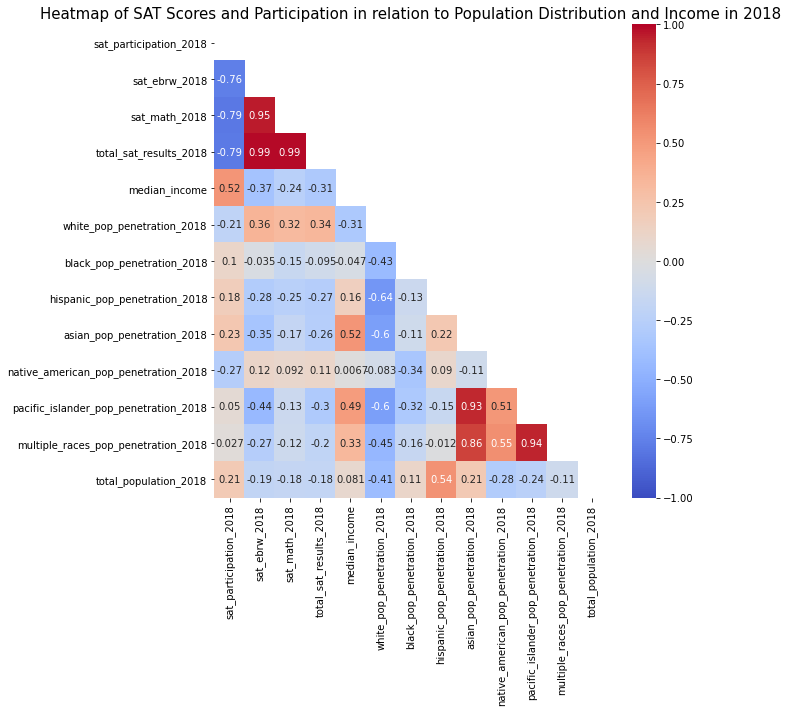

In [60]:
heatmap(merged_df_2018,'Heatmap of SAT Scores and Participation in relation to Population Distribution and Income in 2018',10,10)

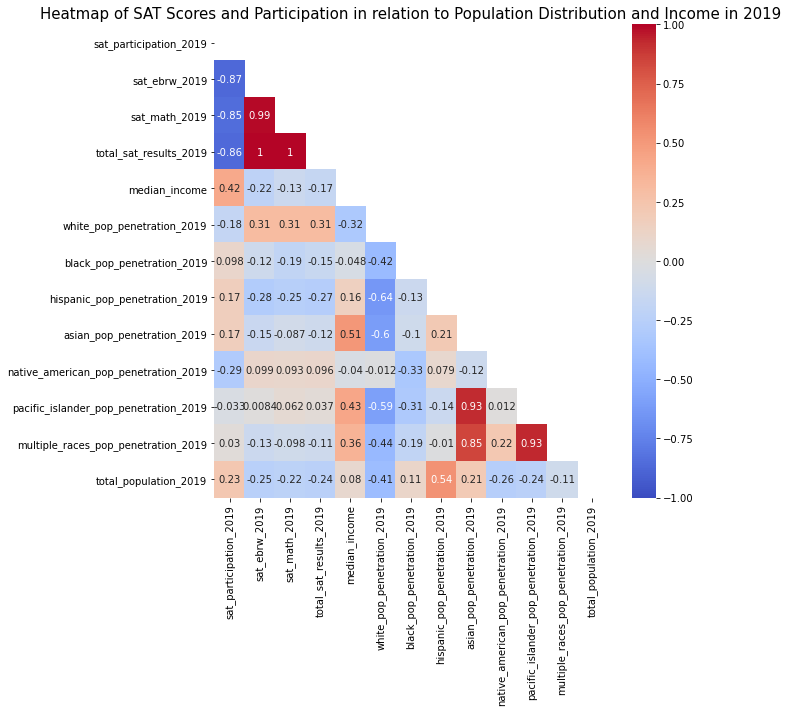

In [61]:
heatmap(merged_df_2019,'Heatmap of SAT Scores and Participation in relation to Population Distribution and Income in 2019',10,10)

The heatmaps above give us a legible summary of the relationship between the datasets by looking at their correlation coefficient. 

Looking at both heatmaps, there are negative correlations between participation and SAT scores in both 2018 and 2019. This may be attributed towards the fact that bigger participation rate means a wider range / sample size of scores which may drag down the mean. 

We also see high positive correlation between total score, Math score and EBRW score, which is not a surprise considering the total score is made up of Math and EBRW scores and that the following data are the average scores per state. 

Negative correlation between each population penetration is expected being that if one race increase in absolute population number, their increase in contribution towards total population result in a relative decrease of other races' contribution towards total. However, the positive correlation of Pacific Islander, Mixed-Race, and Asians may be attributed towards an overall increase in population within the states with said ethnicities. 

Looking at the relationship between race and SAT score, we can see a slight positive correlation of ~0.3 in both 2018 and 2019.

Although correlation of median income with the rest of the dataset seem relatively small (and negative), further exploration of the relationship with SAT performance in 2018 and 2019 will be discused [below](#Plotting-and-Analyzing-Scatter-Plots) 

### Visualizing Distribution with Histograms

Histogram allows for the graphical representation of distribution of a particular dataset. A function is defined to allow for the creation of multiple histograms in a subplot

In [62]:
# the following function has been adapted from Gwen Rathgeber's (source: https://github.com/gwenrathgeber/SAT_ACT_Poverty_EDA/blob/master/code/Project_1.ipynb)
# changes made are color choices, nrows, height and width inputs for more flexibility each time the function is used

def histogram_subplots(dataframe, nrows, ncols, columns, title, xaxis,w,h):
    ''' This function accepts dataframe, number of rows, number of columns, list of column names,
    list of title for every plot in a subplot, list of xaxis label for every plot, and width and height of
    subplot figure to return multi-plot histogram'''
    
    # each histogram in a subplot should be a different color from the following list
    colors = ["rosybrown","lightcoral","indianred","darkorange","lightsalmon","pink","palevioletred","plum"]
    # subplots are created in a figure made up of nplots per rows and columns in a figure of w by h
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(w,h))
    ax = ax.ravel() # .ravel() turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(columns):
        ax[i].hist(dataframe[column], bins=12, color=colors[i]) #plots histogram per plot in a subplot
        ax[i].set_title(title[i]) # sets title of plot
        ax[i].set_xlabel(xaxis[i]) # set xaxis label of plot
        plt.tight_layout() # for a neater and more legible layout within subplot

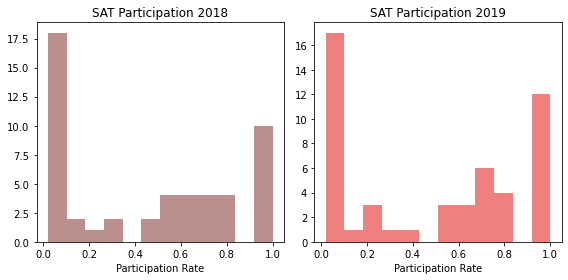

In [63]:
participation_columns = ["sat_participation_2018","sat_participation_2019"]
participation_titles = ["SAT Participation 2018","SAT Participation 2019"]
participation_xaxis_label = ["Participation Rate"] * len(participation_columns)

histogram_subplots(merged_df,1,2,participation_columns,participation_titles,participation_xaxis_label,8,4)

Looking at the above histogram we can see that SAT participation is a non-normal, multimodal (multiple peaks) distribution. Looking at 2018 and 2019 side by side, we can also see the increase in student participation.

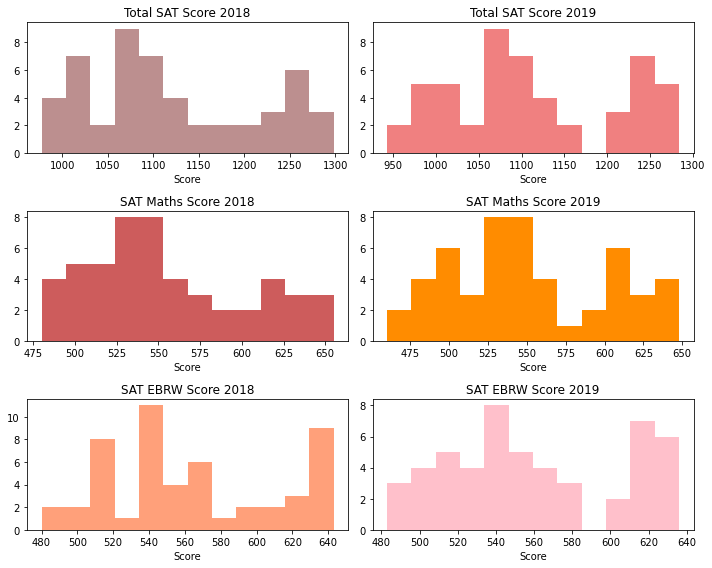

In [64]:
score_columns = ["total_sat_results_2018",
                 "total_sat_results_2019",
                 "sat_math_2018",
                 "sat_math_2019",
                 "sat_ebrw_2018",
                 "sat_ebrw_2019"]
score_titles = ["Total SAT Score 2018",
                "Total SAT Score 2019",
                "SAT Maths Score 2018",
                "SAT Maths Score 2019",
                "SAT EBRW Score 2018",
                "SAT EBRW Score 2019"]
score_xaxis_label = ["Score"] * len(score_titles)

histogram_subplots(merged_df,3,2,score_columns,score_titles,score_xaxis_label,10,8)

SAT scores data also have a non-normal, multimodal distribution this may be attributed towards the different sample sizes per state which are based on the number of students participating  

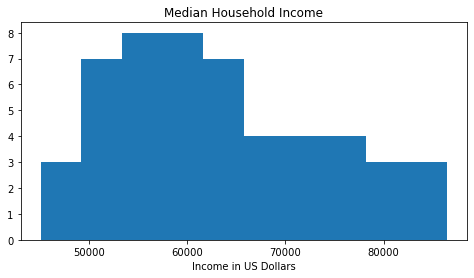

In [65]:
plt.figure(figsize=(8,4))  
plt.hist(merged_df["median_income"])
plt.title("Median Household Income")
plt.xlabel("Income in US Dollars");

Median Household income show a postively skewed normal distribution, it is hard to compare this particular visualization with other datasets considering the rest are mostly non-normally distributed with multimodals

### Exploring Boxplots

Just like the histograms above, boxplots can be used to show data distribution, yet it allows further analysis on the range, median, percentiles and outliers that histograms don't necessarily show. Due to population data having such vast ranges, box plots are employed to show their distribution and different datapoints in a more meaningful way.

In [66]:
# the following function has been adapted from Gwen Rathgeber's (source: https://github.com/gwenrathgeber/SAT_ACT_Poverty_EDA/blob/master/code/Project_1.ipynb)
# changes made are color choices (removed), nrows, height and width inputs for more flexibility each time the function is used

def subplot_boxplots(dataframe, nrows, ncols, columns, title, xshape, xaxis,w,h):
    '''this function accepts dataframe, number of rows and column, list of column names, list of plot titles,
    list of x-axis ranges, and width and height of subplot figure and returns subplotted box plots'''
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(w,h))
    ax = ax.ravel()
    for i, column in enumerate(columns):
        sns.boxplot(data=dataframe, x=column, ax=ax[i])
        ax[i].set_title(title[i])
        ax[i].set_xlabel(xaxis)
        ax[i].set(xlim=xshape[i])
        plt.tight_layout()

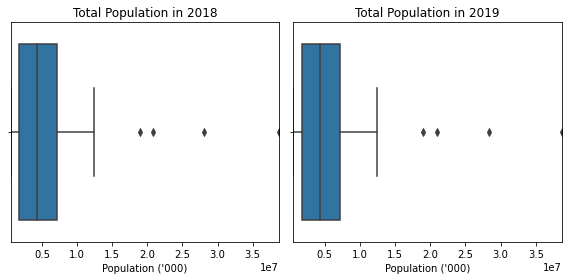

In [67]:
total_population_columns = ["total_population_2018","total_population_2019"]
total_population_title =["Total Population in 2018","Total Population in 2019"]
total_population_shape = [(merged_df["total_population_2018"].min(),merged_df["total_population_2018"].max()),
                          (merged_df["total_population_2019"].min(),merged_df["total_population_2019"].max())]
total_population_xaxis_label = "Population ('000)"

subplot_boxplots(merged_df, 1, 2, 
                 total_population_columns, 
                 total_population_title, 
                 total_population_shape, 
                 total_population_xaxis_label,8,4)

We can see that overall population per state did not change drastically between 2018 and 2019, with a slight decrease in median by -0.02% 

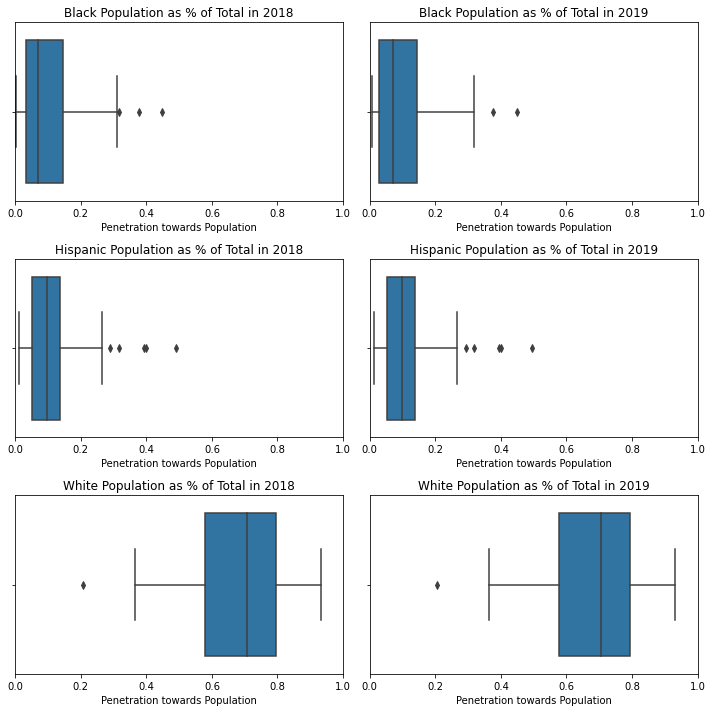

In [68]:
population_columns_1 = sorted([column for column in merged_df.columns 
                             if "white" in column 
                                 or "black" in column
                                 or "hispanic" in column])
population_title_1 =["Black Population as % of Total in 2018",
                   "Black Population as % of Total in 2019",
                   "Hispanic Population as % of Total in 2018",
                   "Hispanic Population as % of Total in 2019",
                   "White Population as % of Total in 2018",
                   "White Population as % of Total in 2019"]
population_shape_1 = [(0,1)] * len(population_columns_1)
population_xaxis_label_1 = "Penetration towards Population"

subplot_boxplots(merged_df,3,2, 
                 population_columns_1, 
                 population_title_1, 
                 population_shape_1, 
                 population_xaxis_label_1,10,10)

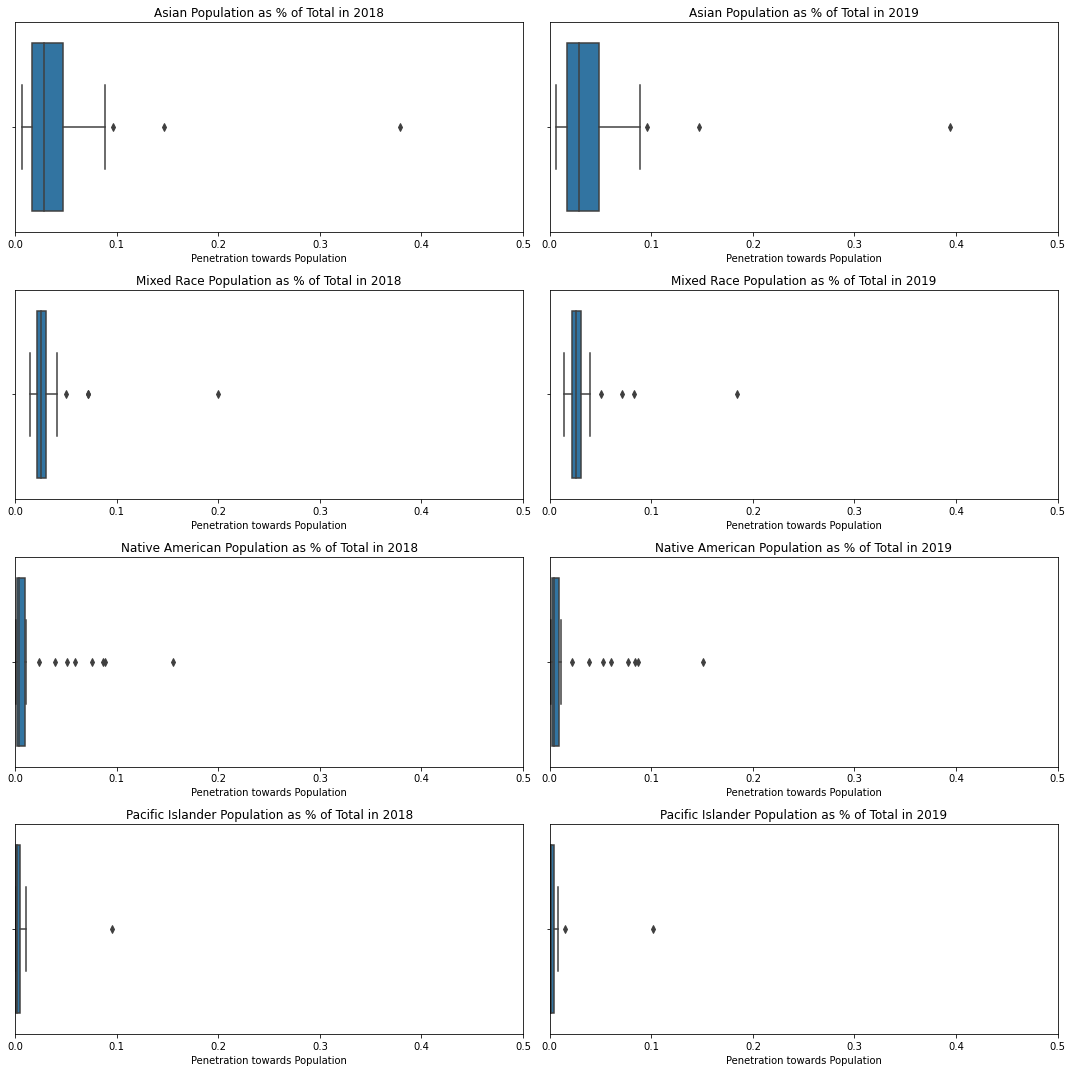

In [69]:
population_columns_2 = sorted([column for column in merged_df.columns 
                             if "pop_penetration" in column
                            and not ("white" in column 
                                 or "black" in column
                                 or "hispanic" in column)])
population_title_2 =["Asian Population as % of Total in 2018",
                   "Asian Population as % of Total in 2019",
                   "Mixed Race Population as % of Total in 2018",
                   "Mixed Race Population as % of Total in 2019",
                   "Native American Population as % of Total in 2018",
                   "Native American Population as % of Total in 2019",
                   "Pacific Islander Population as % of Total in 2018",
                   "Pacific Islander Population as % of Total in 2019"]
population_shape_2 = [(0,0.5)] * len(population_columns_2)
population_xaxis_label_2 = "Penetration towards Population"

subplot_boxplots(merged_df, 4,2, 
                 population_columns_2, 
                 population_title_2, 
                 population_shape_2, 
                 population_xaxis_label_2,15,15)



There is an inverse correlation between white population penetration towards total versus other ethnicities as observed above - this is expected. Overall penetration numbers seem to remain relatively stable - however we can see multiple outliers in almost all cases - this phenomenon is due to the fact [ethnic minorities tend to cluster in areas based on ethnic residential concentration](https://www.jstor.org/stable/30033991?seq=1). Although further analysis could be done on outliers and population distribution, for the purposes of this project it is unnecessary.

### Plotting and Analyzing Scatter Plots

In [70]:
# the following function has been adapted from Gwen Rathgeber's (source: https://github.com/gwenrathgeber/SAT_ACT_Poverty_EDA/blob/master/code/Project_1.ipynb)
# Changes made from above source:
#         1. Inputs: color pallete, nrows, subtitle, show, height and width for inputs 
#         2. Code: created a subplot function for scatter, added subtitle and show=True, adjusted legend location, 
#                  looping through lists of multiple dataframes, columns and title, adding the linear regression line 
#                  and adapting vlines/hlines at the mean of x-axis and y-axis so it would iterate through list
# Additional sources:
#        - Regression line plotting: https://www.python-graph-gallery.com/scatter-plot/
#        - Adjusting legend position: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
#        - Subtitle: https://www.delftstack.com/howto/matplotlib/how-to-set-a-single-main-title-for-all-the-subplots-in-matplotlib/


def scatter_subplot(dataframe,nrows,ncols,columns,title,xaxis,yaxis,legend,w,h,subtitle,show=True):
    '''Accepts dataframe, columns and titles as a list, number of rows and columns in subplot, labels for title, 
    xaxis, yaxis and legend, width and height of subplot figure, and overall title for subplot as input and
    returns subplot of scatter plots. By default show regression line unless stated otherwise'''
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(w,h))
    ax = ax.ravel()
    fig.suptitle(subtitle)
    for i, column in enumerate(columns[:-1]):
        if show:
            #adds regresstion line showing correlation of data (default is to show unless show=False)
            sns.regplot(x=dataframe[i if len(dataframe) > 1 else 0][columns[0][i if len(columns[0]) > 1 else 0]],
                    y=dataframe[i if len(dataframe) > 1 else 0][columns[1][i]], 
                    scatter=False,
                    color="pink",
                    ax=ax[i])
        # plots scatter
        sns.scatterplot(x=dataframe[i if len(dataframe) > 1 else 0][columns[0][i if len(columns[0]) > 1 else 0]], 
                        y=dataframe[i if len(dataframe) > 1 else 0][columns[1][i]],
                        hue=dataframe[i if len(dataframe) > 1 else 0][columns[2][i]], 
                        legend='brief',
                        palette='flare',
                        ax=ax[i]);
        #adds vertical line at mean of x axis
        ax[i].vlines(np.mean(dataframe[i if len(dataframe) > 1 else 0][columns[0][i if len(columns[0]) > 1 else 0]]), 
                     ymin=min(dataframe[i if len(dataframe) > 1 else 0][columns[1][i]]), 
                     ymax=max(dataframe[i if len(dataframe) > 1 else 0][columns[1][i]]), 
                     color='lightcoral')
        #adds horizontal line at mean of x axis
        ax[i].hlines(np.mean(dataframe[i if len(dataframe) > 1 else 0][columns[1][i]]), 
                     xmin=min(dataframe[i if len(dataframe) > 1 else 0][columns[0][i if len(columns[0]) > 1 else 0]]), 
                     xmax=max(dataframe[i if len(dataframe) > 1 else 0][columns[0][i if len(columns[0]) > 1 else 0]]), 
                     color='lightcoral')
        ax[i].set_title(title[i])
        ax[i].set_xlabel(xaxis)
        ax[i].set_ylabel(yaxis)
        ax[i].legend(title=legend, loc='center left', bbox_to_anchor=(1, 0.5))
        plt.tight_layout()

        
    

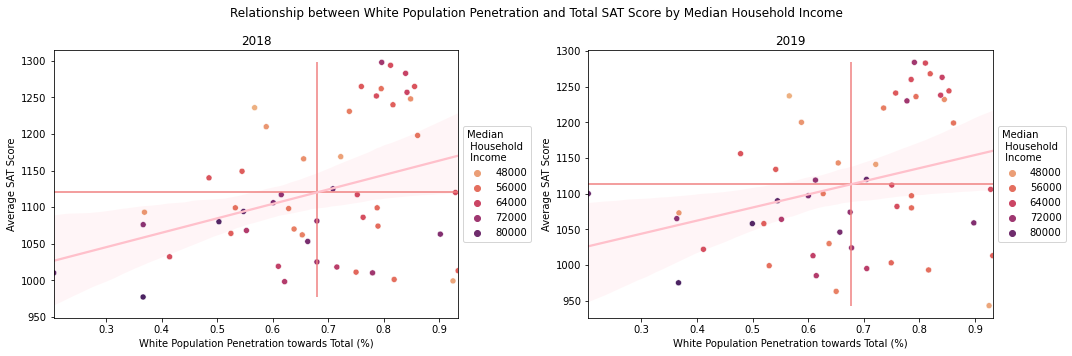

In [71]:
scatter_subplot([merged_df],1,2,
                columns=[["white_pop_penetration_2018","white_pop_penetration_2019"],["total_sat_results_2018","total_sat_results_2019"],
                         ["median_income","median_income"]],
                title=["2018","2019"],
                xaxis = "White Population Penetration towards Total (%)",
                yaxis = "Average SAT Score",
                legend = "Median \n Household \n Income",
                w=15,
                h=5,
                subtitle = 'Relationship between White Population Penetration and Total SAT Score by Median Household Income')

Positive correlation can be seen between Average SAT Score and White Population Penetration towards the Total Population, with a correlation coefficient of 34% and 31% in 2018 and 2019, respectively. However, the relationship between median household income and white population penetration is unclear when looking at the colored clusters.  

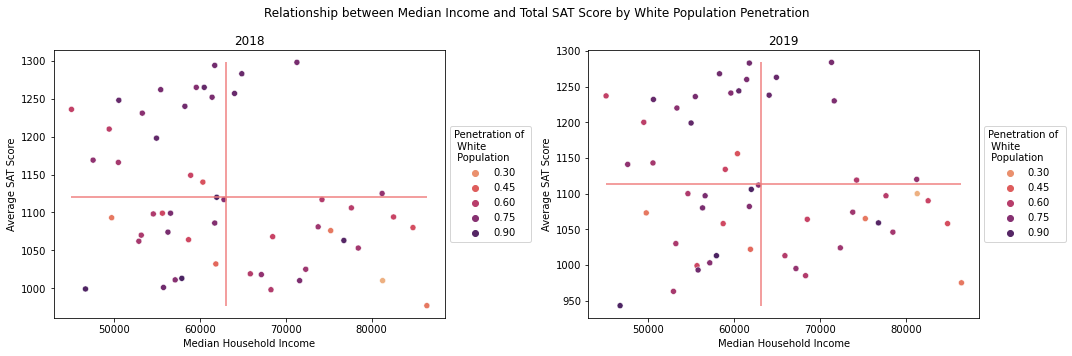

In [72]:
scatter_subplot([merged_df],1,2,
                columns=[["median_income"],["total_sat_results_2018","total_sat_results_2019"],
                         ["white_pop_penetration_2018","white_pop_penetration_2019"]],
                title=["2018","2019"],
                xaxis = "Median Household Income",
                yaxis = "Average SAT Score",
                legend = "Penetration of \n White \n Population",
                w=15,
                h=5,
                subtitle = 'Relationship between Median Income and Total SAT Score by White Population Penetration',
                show=False)

Looking at the scatter plots in the second subplot, it can be observed that there is little to no correlation between average SAT Score and Median Household Income. However, a cluster of states with a relatively large penetration of white population recieving high marks can be spotted - proving the previous notion above and showing the positive correlation between having a larger penetration of white population and higher test scores. 

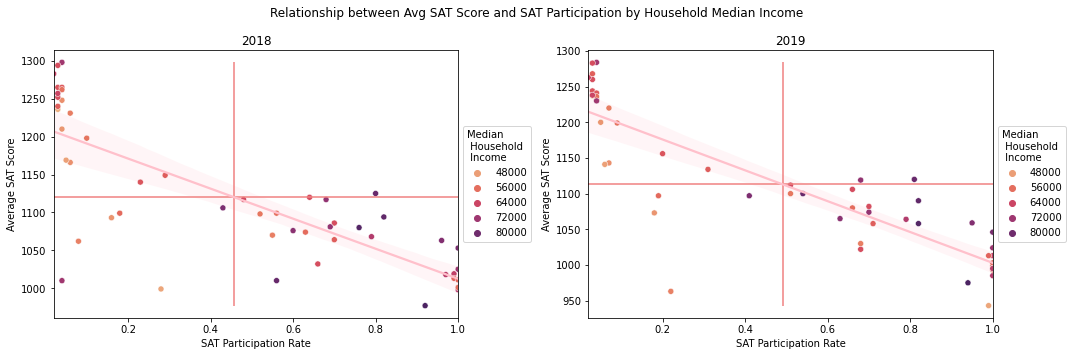

In [73]:
scatter_subplot([merged_df],1,2,
                columns=[["sat_participation_2018","sat_participation_2019"],["total_sat_results_2018","total_sat_results_2019"],
                         ["median_income","median_income"]],
                title=["2018","2019"],
                xaxis = "SAT Participation Rate",
                yaxis = "Average SAT Score",
                legend = "Median \n Household \n Income",
                w=15,
                h=5,
                subtitle = 'Relationship between Avg SAT Score and SAT Participation by Household Median Income')

When we analyse the relationship between average SAT scores and participation rates, however, we can see a clear negative correlation, with a correlation coefficient of -79% in 2018 and -86% in 2019. This may be due to the fact that lower SAT participation means a smaller sample size and being that there are two forms of standardized testing, it could be assumed that students who chose to do the SAT instead of the ACT made the concious and active decision to do so and therefore are more likely to have studied more extensively for it. Higher SAT participation means the range of students' academic capabilities are wider, dragging down the mean score of those states.

Due to the fact that there are differing sample sizes of scores making up the average SAT score per state, and being that median household income represents close to 100% of the states' population, in order for the correlation to be better observed, participation rate is filtered to show correlation when participation is below Q1, within IQR and above Q3.

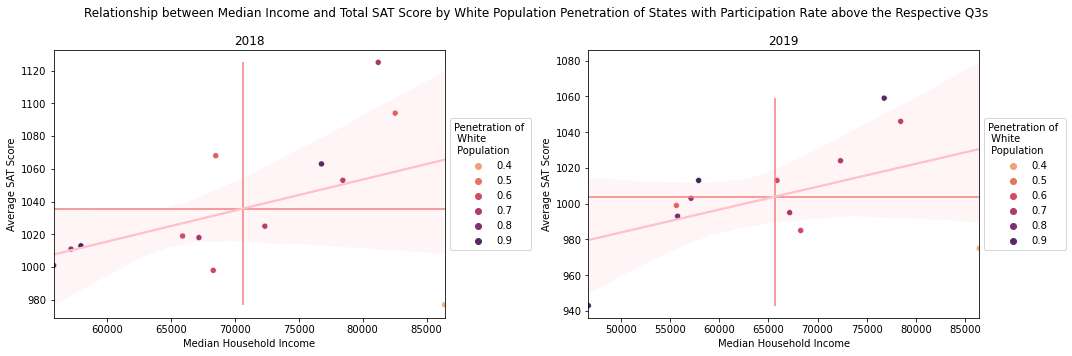

In [74]:
q3_df_2018 = merged_df[merged_df["sat_participation_2018"] > 
                         np.percentile(merged_df["sat_participation_2018"],75)]
q3_df_2019 = merged_df[merged_df["sat_participation_2019"] >
                         np.percentile(merged_df["sat_participation_2019"],75)]

scatter_subplot([q3_df_2018,q3_df_2019],1,2,
                columns=[["median_income"],["total_sat_results_2018","total_sat_results_2019"],
                         ["white_pop_penetration_2018","white_pop_penetration_2019"]],
                title=["2018","2019"],
                xaxis = "Median Household Income",
                yaxis = "Average SAT Score",
                legend = "Penetration of \n White \n Population",
                w=15,
                h=5,
                subtitle = 'Relationship between Median Income and Total SAT Score by White Population Penetration of States with Participation Rate above the Respective Q3s')

Once participation filtered above the 75th percentile, it can be observed that there is a positive correlation between median income and average SAT score, with a correlation coefficient of 45% in 2018 and 48% in 2019. We can also observe that most states within this cohort has over 50% penetration of white population towards total.

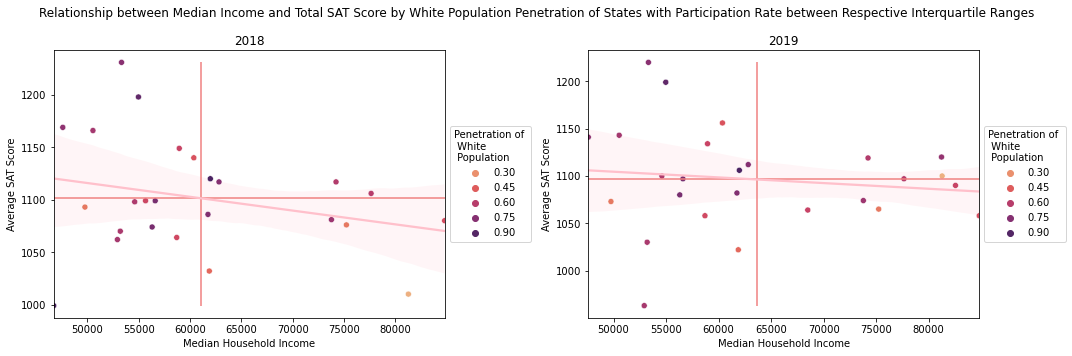

In [75]:
iqr_df_2018 = merged_df[(merged_df["sat_participation_2018"] >= 
                         np.percentile(merged_df["sat_participation_2018"],25)) &
                       (merged_df["sat_participation_2018"] <= 
                         np.percentile(merged_df["sat_participation_2018"],75))]
iqr_df_2019 = merged_df[(merged_df["sat_participation_2019"] >= 
                         np.percentile(merged_df["sat_participation_2019"],25)) &
                       (merged_df["sat_participation_2019"] <= 
                         np.percentile(merged_df["sat_participation_2019"],75))]

scatter_subplot([iqr_df_2018,iqr_df_2019],1,2,
                columns=[["median_income"],["total_sat_results_2018","total_sat_results_2019"],
                         ["white_pop_penetration_2018","white_pop_penetration_2019"]],
                title=["2018","2019"],
                xaxis = "Median Household Income",
                yaxis = "Average SAT Score",
                legend = "Penetration of \n White \n Population",
                w=15,
                h=5,
                subtitle = 'Relationship between Median Income and Total SAT Score by White Population Penetration of States with Participation Rate between Respective Interquartile Ranges')

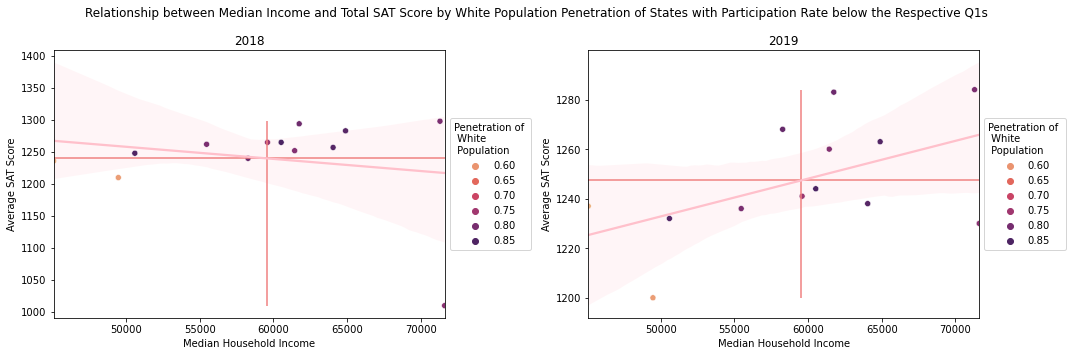

In [76]:
q1_df_2018 = merged_df[merged_df["sat_participation_2018"] < 
                         np.percentile(merged_df["sat_participation_2018"],25)]
q1_df_2019 = merged_df[merged_df["sat_participation_2019"] <
                         np.percentile(merged_df["sat_participation_2019"],25)]

scatter_subplot([q1_df_2018,q1_df_2019],1,2,
                columns=[["median_income"],["total_sat_results_2018","total_sat_results_2019"],
                         ["white_pop_penetration_2018","white_pop_penetration_2019"]],
                title=["2018","2019"],
                xaxis = "Median Household Income",
                yaxis = "Average SAT Score",
                legend = "Penetration of \n White \n Population",
                w=15,
                h=5,
                subtitle = 'Relationship between Median Income and Total SAT Score by White Population Penetration of States with Participation Rate below the Respective Q1s')

Looking at the correlation when filtering participation by its IQR and 25th percentiles, most plot show a very small negative correlation (as a result of smaller sample sizes). With the exception of 2019 for states with participation below Q1 at 5.5%, in which penetration of white population within the cohort is high. 

## Conclusions and Recommendations 

This report suggests that there are slight positive correlations between SAT Scores and:

1. Household Income in states with participation rates higher than 77.5% in 2018 and 82% in 2019;
2. and White Population Penetration towards total Population.

This confirms the basis behind Public Counsel's lawsuit and it is recommended for University X to drop the use of SAT test scores as an admission requirement.

If the analysis were to be repeated, data points should be collected from the same population sample (instead of 3 separate contexts of aggregated data) so that correlation / relationship between each factor (score, household income and race) may be clearer and more precise. 